In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#导入数据
credit_card = pd.read_csv('C:\\Users\\acerpc\\Desktop\\code&data\\creditcard_exp.csv',skipinitialspace=True)
credit_card.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [3]:
#数据清洗
exp = credit_card[credit_card.avg_exp.notnull()].copy().iloc[:,2:].drop('age2',axis=1)
exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


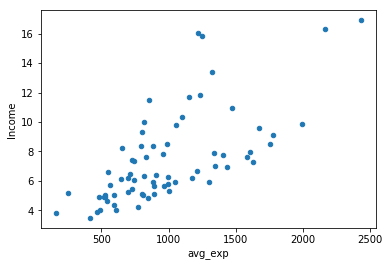

In [4]:
#相关性分析
#散点图
exp.plot('avg_exp','Income',kind='scatter')

In [5]:
#相关系数
exp[['avg_exp','Age','Income','dist_home_val']].corr()

,avg_exp,Age,Income,dist_home_val
avg_exp,1.000000,0.258478,0.674011,0.319499
Age,0.258478,1.000000,0.369129,0.109323
Income,0.674011,0.369129,1.000000,0.249153
dist_home_val,0.319499,0.109323,0.249153,1.000000


In [6]:
#线性回归算法
model = ols('avg_exp~Income',data=exp).fit()
print(model.params)

Intercept    258.049498
Income        97.728578
dtype: float64


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.60e-10
Time:                        09:05:26   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#预测值和残差
pd.DataFrame({'predict':model.predict(exp.Income),'resid':model.resid}).head()

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [9]:
exp_new = credit_card[credit_card.avg_exp.isnull()].copy().iloc[:,2:].drop('age2',axis=1)
exp_new.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
2,NaN,NaN,1,36,8.40,0,0,88.61,7.49,0.91,1
11,NaN,NaN,1,22,5.10,0,0,109.07,4.78,0.32,1
13,NaN,NaN,0,27,4.90,0,1,53.93,5.43,-0.53,1
19,NaN,NaN,0,41,4.39,0,1,97.06,4.65,-0.26,1
20,NaN,NaN,1,54,4.18,0,0,10.01,4.59,-0.41,0


In [10]:
model.predict(exp_new)[:5]

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

In [11]:
#多元线性回归
model2 = ols('avg_exp~Income+dist_home_val+dist_avg_income',data=exp).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.34e-11
Time:                        09:05:27   Log-Likelihood:                -498.62
No. Observations:                  70   AIC:                             1005.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3507    122.525      0.019      0.985    -242.278     246.980
Income           -164.4378     86.487     -1.901      0.062    -337.115       8.239
dist_home_val       1.5396      1.049      1.468      0.147      -0.555       3.634
dist_avg_income   260.7522     87.058      2.995      0.004      86.934     434.570
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.367
Skew:                           0.642   Prob(JB):                       0.0683
Kurtosis:                       2.563   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#多元线性回归的变量筛选
'''forward select'''
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)

In [23]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
model3 = forward_select(data=data_for_select,response='avg_exp')
model3.rsquared

aic is 1007.6801413968115,continuing!
aic is 1005.4969816306302,continuing!
aic is 1005.2487355956046,continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income + Income + dist_home_val 


0.541151292841195

In [25]:
#线性回归的诊断
#残差分析
ana1 = model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.60e-10
Time:                        09:54:01   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

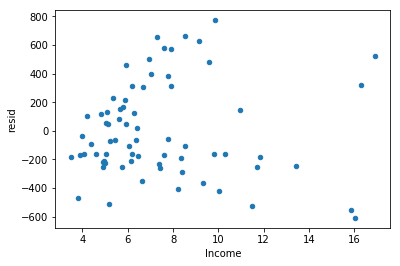

In [30]:
exp['predict'] = ana1.predict(exp)
exp['resid'] = ana1.resid
exp.plot('Income','resid',kind='scatter')
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     45.92
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.58e-09
Time:                        09:54:21   Log-Likelihood:                -28.804
No. Observations:                  70   AIC:                             61.61
Df Residuals:                      68   BIC:                             66.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0587      0.116     52.077      0.000       5.827       6.291
Income         0.0982      0.014      6.776      0.000       0.069       0.127
==============================================================================
Omnibus:                       10.765   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.708
Skew:                          -0.688   Prob(JB):                      0.00174
Kurtosis:                       4.569   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

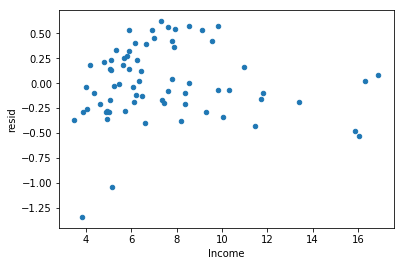

In [32]:
ana2 = ols('avg_exp_ln~Income',exp).fit()
exp['predict'] = ana2.predict(exp)
exp['resid'] = ana2.resid
exp.plot('Income','resid',kind='scatter')
ana2.summary()

In [33]:
#遇到异方差情况,教科书上会介绍使用加权最小二乘法，但是实际上最常用的是对被解释变量取对数
#取对数会使模型更有解释意义
exp['Income_ln']=np.log(exp.Income)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     62.87
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.95e-11
Time:                        11:40:04   Log-Likelihood:                -23.950
No. Observations:                  70   AIC:                             51.90
Df Residuals:                      68   BIC:                             56.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0611      0.222     22.833      0.000       4.619       5.503
Income_ln      0.8932      0.113      7.929      0.000       0.668       1.118
==============================================================================
Omnibus:                        8.382   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.074
Skew:                          -0.668   Prob(JB):                       0.0177
Kurtosis:                       3.992   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

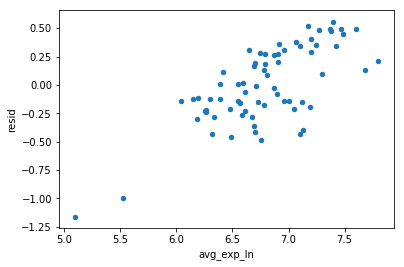

In [60]:
ana3 = ols('avg_exp_ln~Income_ln',exp).fit()
exp['predict'] = ana3.predict(exp)
exp['resid'] = ana3.resid
exp.plot('avg_exp_ln','resid',kind='scatter')
ana3.summary()

In [40]:
#寻找最优模型
pd.DataFrame({'exp~Income':ana1.rsquared, 'ln(exp)~Income':ana2.rsquared,'ln(exp)~ln(Income)':ana3.rsquared},index=range(1))

,exp~Income,ln(exp)~Income,ln(exp)~ln(Income)
0,0.454291,0.403086,0.480393


In [41]:
#强影响点分析
exp['resid_t'] = (exp.resid-exp.resid.mean())/exp.resid.std()

In [50]:
#find_outlier
exp[abs(exp.resid_t)>2]

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,predict,resid,Income_ln,resid_t
73,251.56,5.527682,0,29,5.1578,0,0,63.23,5.492947,-0.335147,0,6.526331,-0.998649,1.640510,-2.910292
98,163.18,5.094854,0,22,3.8159,0,0,63.27,3.997789,-0.181889,0,6.257191,-1.162337,1.339177,-3.387317


D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     64.43
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.37e-11
Time:                        11:40:32   Log-Likelihood:                -11.560
No. Observations:                  68   AIC:                             27.12
Df Residuals:                      66   BIC:                             31.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3123      0.192     27.598      0.000       4.928       5.697
Income_ln      0.7804      0.097      8.027      0.000       0.586       0.975
==============================================================================
Omnibus:                       17.307   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.415
Skew:                           0.215   Prob(JB):                        0.110
Kurtosis:                       1.828   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

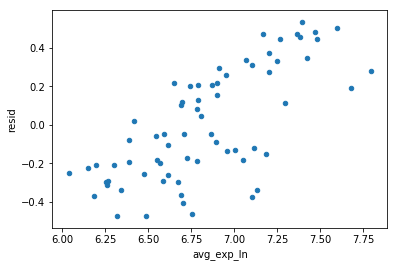

In [62]:
#drop outlier
exp_re = exp[abs(exp.resid_t)<=2]
model4 = ols('avg_exp_ln~Income_ln',exp_re).fit()
exp_re['predict'] = model4.predict(exp_re)
exp_re['resid'] = model4.resid
exp_re.plot('avg_exp_ln','resid',kind='scatter')
model4.summary()

In [49]:
#statemodels包提供了更多强影响点判断指标
from statsmodels.stats.outliers_influence import OLSInfluence
OLSInfluence(ana3).summary_frame().head()

,dfb_Intercept,dfb_Income_ln,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.343729,-0.381393,0.085587,-1.319633,0.089498,-0.413732,-1.326996,-0.416040
1,0.307196,-0.341294,0.069157,-1.201699,0.087409,-0.371907,-1.205702,-0.373146
3,0.207619,-0.244956,0.044984,-1.440468,0.041557,-0.299947,-1.452165,-0.302382
4,0.112301,-0.127713,0.010759,-0.575913,0.060926,-0.146693,-0.573062,-0.145967
5,0.120572,-0.150924,0.022274,-1.221080,0.029011,-0.211064,-1.225579,-0.211842


In [58]:
exp1 = exp.join(OLSInfluence(ana3).summary_frame()['student_resid'])
exp2 = exp1[abs(exp1.student_resid)<=2]
model5 = ols('avg_exp_ln~Income_ln',exp2).fit()
model5.summary()
#多元情况下，强影响点观察用Y和残差做散点图

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     64.43
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.37e-11
Time:                        11:29:16   Log-Likelihood:                -11.560
No. Observations:                  68   AIC:                             27.12
Df Residuals:                      66   BIC:                             31.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3123      0.192     27.598      0.000       4.928       5.697
Income_ln      0.7804      0.097      8.027      0.000       0.586       0.975
==============================================================================
Omnibus:                       17.307   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.415
Skew:                           0.215   Prob(JB):                        0.110
Kurtosis:                       1.828   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''增加变量
经过单变量线性回归的处理，我们基本对模型的性质有了一定的了解，接下来可以放入更多的连续型解释变量。
在加入变量之前，要注意变量的函数形式转变。比如当地房屋均价、当地平均收入，其性质和个人收入一样，都需要取对数'''

In [63]:
exp2['dist_home_val_ln'] = np.log(exp2.dist_home_val)
exp2['dist_avg_income_ln'] = np.log(exp2.dist_avg_income)
model6 = ols('avg_exp_ln~ Age + Income_ln + dist_home_val_ln + dist_avg_income_ln',
          exp2).fit()
model6.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.79e-10
Time:                        11:54:42   Log-Likelihood:                -7.3496
No. Observations:                  68   AIC:                             24.70
Df Residuals:                      63   BIC:                             35.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6265      0.317     14.574      0.000       3.992       5.261
Age                   -0.0006      0.005     -0.117      0.907      -0.011       0.010
Income_ln             -0.1802      0.569     -0.317      0.752      -1.317       0.957
dist_home_val_ln       0.1258      0.058      2.160      0.035       0.009       0.242
dist_avg_income_ln     1.0093      0.612      1.649      0.104      -0.214       2.233
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.466
Skew:                           0.248   Prob(JB):                        0.291
Kurtosis:                       2.210   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model6?

In [87]:
exp2[['avg_exp_ln', 'Age' , 'Income_ln' , 'dist_home_val_ln' , 'dist_avg_income_ln']].to_excel('C:\\Users\\acerpc\\Desktop\\credit_r.xls')

In [64]:
#多重共线性分析
#Step regression is not always work.

In [66]:
model6.bse # The standard errors of the parameter estimates

Intercept             0.317453
Age                   0.005124
Income_ln             0.568848
dist_home_val_ln      0.058210
dist_avg_income_ln    0.612197
dtype: float64

In [79]:
#方差膨胀因子
def vif(data):
    vif = []
    for column in data.columns:
        columns = list(data.columns)
        columns.remove(column)
        formula = column+ '~' + '+'.join(columns)
        model_r2 = ols(formula=formula,data=data).fit().rsquared
        vif.append(1/(1-model_r2))
    result = pd.DataFrame({'variable':data.columns,'vif':vif})
    return result

In [80]:
exog = exp2[['Age', 'Income_ln', 'dist_home_val_ln',
             'dist_avg_income_ln']]
vif(exog)

,variable,vif
0,Age,1.169119
1,Income_ln,36.983314
2,dist_home_val_ln,1.053629
3,dist_avg_income_ln,36.922866


In [81]:
#Income_ln与dist_avg_income_ln具有共线性，使用“高出平均收入的比率”代替其中一个
exp2['high_avg_ratio']=exp2['high_avg']/exp2['dist_avg_income']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
exog1 = exp2[['Age', 'high_avg_ratio', 'dist_home_val_ln', 
              'dist_avg_income_ln']]
vif(exog1)

,variable,vif
0,Age,1.170766
1,high_avg_ratio,1.134719
2,dist_home_val_ln,1.052733
3,dist_avg_income_ln,1.308904


In [84]:
#引入哑变量
formula1 = 'avg_exp_ln~ dist_avg_income_ln + dist_home_val_ln + C(gender)+C(Ownrent)+C(Selfempl)+C(edu_class)'
model7 = ols(formula1,exp2).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.71
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.75e-24
Time:                        16:26:50   Log-Likelihood:                 35.337
No. Observations:                  68   AIC:                            -54.67
Df Residuals:                      60   BIC:                            -36.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5520      0.212     21.471      0.000       4.128       4.976
C(gender)[T.1]        -0.4301      0.060     -7.200      0.000      -0.550      -0.311
C(Ownrent)[T.1]        0.0184      0.045      0.413      0.681      -0.071       0.107
C(Selfempl)[T.1]      -0.3805      0.119     -3.210      0.002      -0.618      -0.143
C(edu_class)[T.2]      0.2895      0.051      5.658      0.000       0.187       0.392
C(edu_class)[T.3]      0.4686      0.060      7.867      0.000       0.349       0.588
dist_avg_income_ln     0.9563      0.098      9.722      0.000       0.760       1.153
dist_home_val_ln       0.0522      0.034      1.518      0.134      -0.017       0.121
==============================================================================
Omnibus:                        3.788   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.142
Skew:                           0.020   Prob(JB):                        0.126
Kurtosis:                       4.208   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
formula2 = 'avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + C(Selfempl) + C(gender)*C(edu_class)'
model8 = ols(formula2,exp2).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     78.50
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.42e-28
Time:                        18:39:50   Log-Likelihood:                 48.743
No. Observations:                  68   AIC:                            -79.49
Df Residuals:                      59   BIC:                            -59.51
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.4098      0.178     24.839      0.000       4.055       4.765
C(Selfempl)[T.1]                    -0.2945      0.101     -2.908      0.005      -0.497      -0.092
C(gender)[T.1]                      -0.0054      0.098     -0.055      0.956      -0.201       0.190
C(edu_class)[T.2]                    0.3164      0.045      7.012      0.000       0.226       0.407
C(edu_class)[T.3]                    0.5576      0.054     10.268      0.000       0.449       0.666
C(gender)[T.1]:C(edu_class)[T.2]    -0.4304      0.111     -3.865      0.000      -0.653      -0.208
C(gender)[T.1]:C(edu_class)[T.3]    -0.5948      0.111     -5.362      0.000      -0.817      -0.373
dist_avg_income_ln                   0.9893      0.078     12.700      0.000       0.833       1.145
dist_home_val_ln                     0.0654      0.029      2.278      0.026       0.008       0.123
==============================================================================
Omnibus:                        5.023   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.070
Skew:                          -0.328   Prob(JB):                       0.0793
Kurtosis:                       4.166   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""